# Problem Sheet 1

Print as pdf by email, or print out and hand in by hand. If you run out of time


## 1.1 Simple Random Walk

### a

Simple Random Walk on ${1,...,L}$ with probabilities $p \in [0,1]$ and $q = 1-p$ to jump right and left respectively. 

#### Case 1 - Periodic

Transition matrix:



$P = \begin{bmatrix}
    0 & p & 0 & \dots  & 0 & q \\
    q & 0 & p & \dots  & 0 & 0\\
    0 & q & 0 & \dots  & 0 & 0\\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \dots & 0 & p \\
    p & 0 & 0 & \dots & q & 0
\end{bmatrix}$

The process is irreducible, i.e. every state can, eventually, reach every other state. 

The states can be laid out on a circle, and are symmetrical, so there is a stationary distribution where all states have equal probabilities. 

$\pi = (1,1,...,1)$

And normalised:

$\pi = (1/L, 1/L,..., 1/L)$

This is the only stationary distribution, and is the same for all $p \in (0,1)$ 

The stationary distribution is reversible, as $p(x,y) = p(y,x) = 1/L$ for all x,y.

#### Case 2 - Closed

Transition matrix:



$P = \begin{bmatrix}
    q & p & 0 & \dots  & 0 & 0 \\
    q & 0 & p & \dots  & 0 & 0\\
    0 & q & 0 & \dots  & 0 & 0\\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \dots & 0 & p \\
    0 & 0 & 0 & \dots & q & p
\end{bmatrix}$

The process is irreducible. 

If p = 1, there is an absorbing state at L, and the stationary dsitribution is $\pi = (0,0,...,0,1)$. This stationary distribution is reversible, all terms in detailed balance relations are zero. 

If q = 1, there is an absorbing state at 1, and the stationary dsitribution is $\pi = (1,0,...,0,0)$. This stationary distribution is reversible, all terms in detailed balance relations are zero. 

if p = q =1/2, the sum of all columns equal 1, so there is a stationary distribution for $\pi = (1/L, 1/L,..., 1/L)$. This stationary distribution is reversible.

Question -> does stationary dsitribution need to be normalised? - Yes.
Question -> if sum of all columns is 1, is constant vector a prob distribution? - Yes. Left eigenvector is constant.
Question -> How to work out general case for closed SRW - done in lecture, in workbook. Method 1 is through writing recursion realtions. Often easier to chekc for detailed balance first, and to write a simpler recursion relation based on that. 

For p not equal to q, solution will be reversible.



$P = \begin{bmatrix}
    1 & 0 & 0 & \dots  & 0 & 0 \\
    q & 0 & p & \dots  & 0 & 0\\
    0 & q & 0 & \dots  & 0 & 0\\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \dots & 0 & p \\
    0 & 0 & 0 & \dots & 0 & 1
\end{bmatrix}$

The process is not irreducible, as no other states can be reached from satte 1 or state L. 

The (normalised) stationary distributions are

$\pi_1 = [1,0,0,...,0]$

$\pi_2 = [0,0,0,...,1]$

$\pi_3 = [a,0,0,..,0,1-a] \text{ where } a \in [0,1]$





These distributions are reversible, looking at the detailed balance conditions:

$\pi(x)p(x,y) = \pi(y)p(y,x)$ 

All terms for all equations are zero, therefore it is reversible.


Question. Are these reversible - detaied balance conditions, I think, hold. 

Question => What does it mean to have a reversible stationary distribution? Surely all stationary distributions are reversible? No, a coutner example would eb the weather in Oz I think. Not stationary if there is some time based movemment. So for example in aperiodic simple random walk, if p doe not equal q, there is a stationary dsitribution with all consatnts, but there is a current around the loop, so not reversible. 


Stefan's tips:
if p=q , h_k = a + bk

if p =/= q, h_k = a(p/q)^k + b


.


$h_k^L = P(X_n = L \text{ for some } n \geq 0|X_0 = k)$

is the absorption probability in site L. 


$h_k^L = P(X_n = L \text{ for some } n \geq 0|X_0 = k)$

$h_k^L = P(X_n = L | X_0 = k)$

Consider k+1, k-1


By law of total probability:

$h_{k}^L = P(X_n = L | X_1 = k+1, X_0 = k) * p + P(X_n = L | X_1 = k-1, X_0 = k) * q $

Markov property:

$h_{k}^L = P(X_n = L | X_1 = k+1) \times p + P(X_n = L | X_1 = k-1) \times q $

$h_{k}^L = h_{k+1}^L \times p + h_{k-1}^L \times q $

And boundary conditions:

$h_{1}^L = 0 \text{ and } h_{L}^L = 1$


ansatz:  $h_{k}^L = \lambda^k $

$\lambda = p \lambda^2 + q$

This has roots:

$\lambda_1 = 1 \text{ and } \lambda_2 = q/p$

The general solution is of the form:

$h_k^L = a\lambda_1 + b\lambda_2$ 

$h_k^L = a + b(\frac{q}{p})^k$ 


Looking at the boundary conditions, for p not equal to q:

$h_1^L = 0 = a + b(\frac{q}{p})$

$H_L^L = 1 = a + b(\frac{q}{p})^L$

SUbtracting the first eqaution from the first equation:

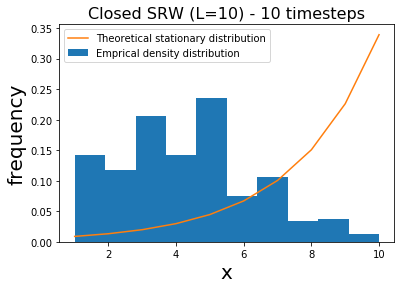

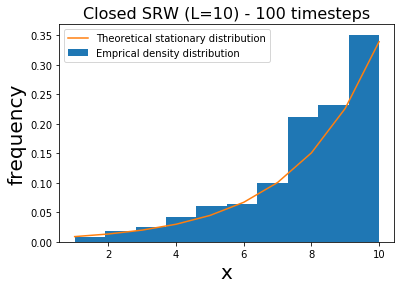

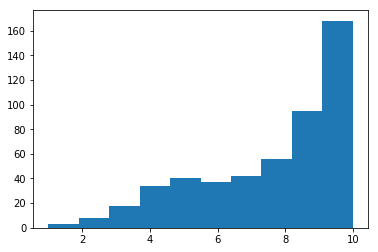

In [29]:
import random

import matplotlib.pyplot as plt

# 1.c Simple Random Walk
def get_next_position(current_position, step, length, boundary_conditions):

	if boundary_conditions == "unlimited":
		return current_position + step

	elif boundary_conditions == "periodic":
		# Subtract and then add 1 to deal with python indexing at 0 while still making use of modulus function
		return (current_position + step-1)%(length) + 1
	
	elif boundary_conditions == "reflecting":
		if current_position == length:
			return length -1
		elif current_position == 1:
			return 2	
		else:
			return current_position + step
		
	elif boundary_conditions == "closed":
		next_position = current_position + step
		if next_position > length:
			return length
		elif next_position < 1:
			return 1
		else:
			return next_position

	elif boundary_conditions == "absorbing":
		if current_position == length:
			return length
		elif current_position == 1:
			return 1
		else:
			return current_position + step


def simple_random_walk(p, total_steps, length, boundary_conditions):

	positions = [1]
	steps = []

	for i in range(total_steps):
		if random.random() < p:
			step = 1
		else:
			step = -1

		steps.append(step)
		current_position = positions[i]
		next_position = get_next_position(current_position, step, length, boundary_conditions)
		positions.append(next_position)

	return positions


def plot_distribution_500_realisations(total_steps):

	p = 0.6
	realisations = 500
	observations = []
	for i in range(realisations):
		final_position = simple_random_walk(p, total_steps, 10, "closed")[-1]
		observations.append(final_position)

    
	plt.hist(observations, density=True, label="Emprical density distribution")
	states = [1,2,3,4,5,6,7,8,9,10]
	stat_dist = [(p/(1-p))**x for x in states]
	total_stat_dist = sum(stat_dist)
	stat_dist_norm = [x/total_stat_dist for x in stat_dist]
	plt.plot(states, stat_dist_norm, label="Theoretical stationary distribution")
	plt.title('Closed SRW (L=10) - {} timesteps'.format(total_steps,p), fontsize = 16)

	plt.legend()
	plt.xlabel('x', fontsize = 20)
	plt.ylabel('frequency', fontsize = 20)

	plt.savefig('empirical_closed_srw_distn_after_{}_steps.png'.format(total_steps))
    
	plt.show()

def plot_distribution_1_realisation_500_steps():

	p = 0.6
	positions = simple_random_walk(p, 500, 10, "closed")
	plt.hist(positions)
	plt.show()

	## TO DO - Normalise the histogram to show the frequency spent in each state, rather than total amount of steps
	## TO DO - add axis labels, legends
	## TO DO - add theoretical/analytical lines

plot_distribution_500_realisations(10)
plot_distribution_500_realisations(100)
plot_distribution_1_realisation_500_steps()





### Question 2

$X_1, X_2, ... $ is a sequence of independent, identically distributed random variables (iirdvs) with $X_i \sim N(\mu, \sigma^2)$ where $\mu \in \mathbb{R}$ and $\sigma^2 > 0$

Discrete time random walk on state space $\mathbb{R}$

$(Y_n : n \geq 0)$ with $Y_{n+1} = Y_n + X_{n+1}$ and $Y_0 = 0$

#### Part a

#### The weak law of large numbers for $Y_n$

$\frac{1}{n}Y_n = \frac{1}{n}\sum\limits_{k=1}^n X_k -> \mu \text{ as } n -> \infty$

The expected value of $\frac{Y_n}{n}$ will converge to $\mu$ with large n.


#### The central limit theorem for $Y_n$

See notes

#### Part b

What is the distribution of $Y_n$ for any arbitrary $n\geq0$?

$Y_n \sim N(n\mu, n\sigma^2)$

### QUESTION - IS THIS RIGHT? MAYBE SEE IN LATER QUESTIONS. CHECK WITH CLASSMATES

#### Part c

Geometric random walk. Discrete time process $(Z_n : n \geq 0)$ on the state space $[0, \infty )$ with $Z_n = exp(Y_n)$. 

Recursive relation:

$Z_{n+1} = exp(Y_{n+1})$

$Z_{n+1} = exp(Y_n + X_{n+1})$

$Z_{n+1} = exp(Y_n)exp(X_{n+1})$

$Z_{n+1} = Z_n exp(X_{n+1})$

QUESTION - IS THAT CORRECT + REST OF PART C


$Z_{n} = \sum\limits_{i=1}^n exp(X_i)$








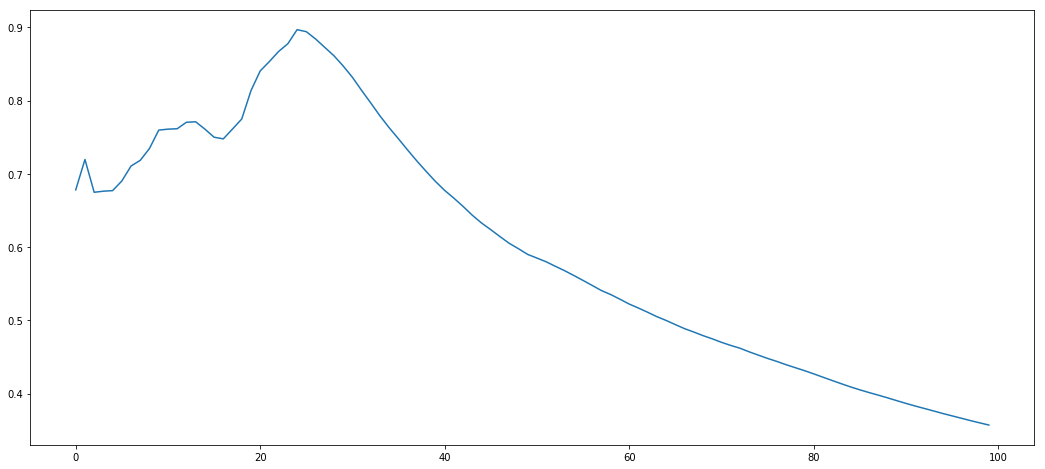

In [4]:
## Part d
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 8]



# Simulate Z_n for one realisation


def one_realisation(mu, sigma, tmax):

    #np.random.seed(12)


    #Generate sequences of random variables
    x_sequence = np.random.normal(mu, sigma, tmax)
    #x_sequence = np.random.randn(tmax)*sigma + mu # How 
    y_sequence = np.cumsum(x_sequence)
    z_sequence = np.exp(y_sequence)

    return y_sequence, z_sequence
    
    
def plot_y_and_z(mu, sigma, tmax):
    
    
    
    y_sequence, z_sequence = one_realisation(mu, sigma, tmax)
    
    plt.plot(range(tmax), z_sequence, label = r'$Z_n$')
    plt.plot(range(tmax), y_sequence, label = r'$Y_n$')
    plt.legend(loc = 'upper left', fontsize = 20)
    plt.xlabel('n', fontsize=20)
    plt.show()

mu = 0
sigma = 0.2
tmax = 100
    

def empirical_results(mu, sigma, tmax):

    realisations = 500
    
    results = np.zeros((realisations,tmax))
    
    for realisation in range(realisations):
        results[realisation,:] = one_realisation(mu,sigma,tmax)[1]

    return results


def plot_empirical_results(mu, sigma, tmax):

    results = empirical_results(mu,sigma,tmax)
        
    empirical_averages = results.mean(axis=0)
    empirical_sds = results.std(axis=0)
    
    
    plt.figure(0)
    plt.errorbar(range(tmax), empirical_averages, yerr=empirical_sds, label = r'Emprical Average')
    
    plt.legend(loc = 'upper left', fontsize = 20)
    plt.xlabel('n', fontsize=20)
    
    
    

def box_plots(mu,sigma,tmax):
    
    tmax = 100
    results = empirical_results(mu,sigma,tmax)
    
    print(type(results))
    
    timestep_10_results = results[:,[9]]
    plt.figure(1)
    plt.boxplot(timestep_10_results)
 


    #plt.figure(2)
    #gkde = stats.gaussian_kde(dataset=timestep_10_results)
    
    #plt.plot(range(tmax), gkde.evaluate(), linestyle='dashed', c='black', lw=2)
    
    
    plt.figure(3)
    plt.boxplot(results[:,[99]])
    
    
    ## Check all this with someone else once you can


def ergodic_average(mu,sigma,tmax):
    
    result = one_realisation(mu,sigma,tmax)[1]
    
    ergodic_totals = np.cumsum(result)
    n_sequence = np.array(range(tmax))+1
    ergodic_averages = np.divide(ergodic_totals, n_sequence)
    
    plt.figure(4)
    plt.plot(range(tmax), ergodic_averages)
    
ergodic_average(mu,sigma,tmax)

    
    
    